# Project 1

First, let's read in the data and necessary libraries.

## Data Gathering:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ALookAtTheData as t
from IPython import display
%matplotlib inline
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option('display.max_colwidth', -1)
from collections import defaultdict


df = pd.read_csv('./survey_results_public.csv')
df2 = pd.read_csv('./survey_results_schema.csv')


# Question 1

**1.** Which benefits apart from salary are important to the respondents?


## Data Understanding:

Let's have a first look at the survey results.

In [2]:
# Check number of rows and columns
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new opportunities",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stack Overflow,9.0,Deskto

We will first have to check what are the questions in the dataset to see what my be of interest for our project as the column names are not always very clear in the results dataset.

In [3]:
# Display all of the data
df2

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to open source projects?
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree-granting college or university program?"
5,EmploymentStatus,Which of the following best describes your current employment status?
6,FormalEducation,Which of the following best describes the highest level of formal education that you've completed?
7,MajorUndergrad,Which of the following best describes your main field of study (aka 'major') in college or university/for your undergraduate studies?
8,HomeRemote,How often do you work from home or remotely?
9,CompanySize,"In terms of the number of employees, how large is the company or organization you work for?"


Looking at the survey results, the column **"ImportantBenefits"** looked interesting.

In [4]:
# Here is the corresponding question

list(df2[df2.Column == 'ImportantBenefits']['Question'])

['When it comes to compensation and benefits, other than base salary, which of the following are most important to you?']

That looks pretty promising. Now we can take a look at the different answers for that question.

In [5]:
study = df['ImportantBenefits'].value_counts().reset_index()
study.head()

,index,ImportantBenefits
0,None of these,248
1,Retirement; Vacation/days off; Health benefits; Expected work hours; Remote options,158
2,Vacation/days off; Equipment; Professional development sponsorship; Expected work hours; Remote options,135
3,Vacation/days off; Health benefits; Equipment; Expected work hours; Remote options,126
4,Vacation/days off; Health benefits; Professional development sponsorship; Expected work hours; Remote options,106


As we can see in the table above, this question allowed multiple selections per user.

Before continuing to split and evaluate the individual parameters, I would like to check for NaN values.

This helps us check against our results later on - the number of NaN values should be reflected in a frequency table.

1) Check how many values in total we have in the column ImportantBenefits

2) Check how many NaN values we have in the column ImportantBenefits

In [6]:
print("Total number of values: ", len(df['ImportantBenefits']))
print("Number of NaN values: ", df['ImportantBenefits'].isna().sum())

Total number of values:  19102
Number of NaN values:  7532


## Data Preparation:

In the following step the NaN values are filled with the string "Not answered"

Not filling out this field could be an indication that these respondents do not care about other benefits

Removing the data all together would therefore not be a realistic depiction of the data


In [7]:
study_benefits_imputed = df['ImportantBenefits'].fillna("Not answered").to_frame()

study_benefits_imputed.head()


,ImportantBenefits
0,Stock options; Vacation/days off; Remote options
1,Not answered
2,Not answered
3,Stock options; Annual bonus; Health benefits; Equipment; Private office
4,Not answered


In the next quick check I wanted to make sure that all of the NaN values were actually filled.

As we can see 7532 values for "Not answered" were found, just as expected (matching our previous NaN count)


In [8]:
study_benefits_count = study_benefits_imputed['ImportantBenefits'].value_counts().reset_index()
study_benefits_count.head()

,index,ImportantBenefits
0,Not answered,7532
1,None of these,248
2,Retirement; Vacation/days off; Health benefits; Expected work hours; Remote options,158
3,Vacation/days off; Equipment; Professional development sponsorship; Expected work hours; Remote options,135
4,Vacation/days off; Health benefits; Equipment; Expected work hours; Remote options,126


In [9]:
# Before continuing, let's change this index column to a more appropriate name

study_benefits_count.rename(columns={'index': 'Benefits', 'ImportantBenefits': 'count'}, inplace=True)
study_benefits_count.head()


,Benefits,count
0,Not answered,7532
1,None of these,248
2,Retirement; Vacation/days off; Health benefits; Expected work hours; Remote options,158
3,Vacation/days off; Equipment; Professional development sponsorship; Expected work hours; Remote options,135
4,Vacation/days off; Health benefits; Equipment; Expected work hours; Remote options,126


I wanted to check whether the individual options for answering can be seen at first glance,
when removing the duplicate values.

However, looking at the number of unique value combinations, this does not help a lot either.

Since I am not familiar with all of the possible options, I will have to split the concatenated answers

In [10]:
noduplicates = study_benefits_imputed.drop_duplicates()
print("Total number of unique combinations: ",len(noduplicates))

Total number of unique combinations:  2433


Going through > 2.000 entries and trying to figure out the individual inputs is way too time consuming, so
splitting the data from the Benefits column by the '; ' (semicolon + whitespace) creating a list of the unique
values should help understand which different answers were provided.

In [11]:
split_benefits = []
for single_benefits in study_benefits_count['Benefits']:
    single_benefits = single_benefits.split("; ")
    split_benefits.extend(single_benefits)

uniquebenefits = set(split_benefits)
print(uniquebenefits)

{'Other', 'Professional development sponsorship', 'Remote options', 'Long-term leave', 'Private office', 'Education sponsorship', 'Stock options', 'Vacation/days off', 'Charitable match', 'Not answered', 'Health benefits', 'Child/elder care', 'Meals', 'Expected work hours', 'Equipment', 'None of these', 'Annual bonus', 'Retirement'}


Now we want to see how often each of these individual values appears -

I will use this this function to assist with process - copied from the udacity notebook

In [12]:
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]
    
    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up 
    '''
    new_df = defaultdict(int)
    for val in look_for:
        for idx in range(df.shape[0]):
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])   
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

Now we can use the function and take a look at the results.

We can see that most users interested in additional vacation days / days off.

The remote options were on the second place and health benefits on third place back then in 2017.

It would be interesting to see if this factor has become more important after Corona

In [13]:
study_df = total_count(study_benefits_count, 'Benefits', 'count', uniquebenefits)
study_df

,Benefits,count
9,Not answered,7532
7,Vacation/days off,6633
2,Remote options,6191
10,Health benefits,5481
13,Expected work hours,5232
14,Equipment,4760
1,Professional development sponsorship,4448
16,Annual bonus,3606
17,Retirement,3028
5,Education sponsorship,1930


The table is illustrated in this bar chart

For easier and quicker visualizations, MS Excel is used for the final visualizations in the article.

Benefits comparison:


Text(0,0.5,'↓ Count          Benefits ID →')

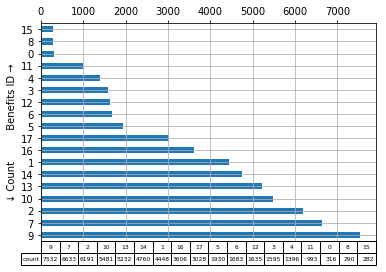

In [14]:
print("Benefits comparison:")
benefits_bar = study_df.plot(kind="barh",table=True,legend=False, grid=True);
benefits_bar.xaxis.tick_top()
plt.ylabel('↓ Count          Benefits ID →')

## Insights / Evaluation:
As the chart above shows, the three most important benefits are

- vacation days
- remote options
- health benefits

While

- private office
- child / elder care
- charitable match

are the least important benefits for the respondents. This means that companies should rather offer remote options than investing in fancy new offices for example.

# Question 2

**2.** Now it would be interesting to know if these preferences are different depending on the current income.

So the question would be:

Of those who earn a lot / average / less than average, what are their priorities for other benefits?

-----

## Data Understanding:
First let's get an idea of how salary is distributed in general.

We will be comparing salary and important benefits here.

Replacing the NaN values in both columns with "No answer".

Here we want to keep the information on who did not give an information for either of the two questions, because

For instance it might be that respondents with high salaries did not answer the additional benefits question or vice versa.


In [15]:
comparison = df[['Salary', 'ImportantBenefits']].copy()

comparison_filled = comparison.fillna("No answer")

comparison_filled.head(15)

,Salary,ImportantBenefits
0,No answer,Stock options; Vacation/days off; Remote options
1,No answer,No answer
2,113750,No answer
3,No answer,Stock options; Annual bonus; Health benefits; Equipment; Private office
4,No answer,No answer
5,No answer,Vacation/days off; Expected work hours
6,No answer,Health benefits; Equipment; Professional development sponsorship; Education sponsorship; Remote options
7,No answer,Equipment; Professional development sponsorship; Expected work hours; Remote options
8,No answer,Stock options; Annual bonus; Health benefits; Equipment; Remote options
9,No answer,Vacation/days off; Long-term leave; Expected work hours; Remote options; Child/elder care


Mean of salary:  58341.3985706
Maximum of salary:  195000.0


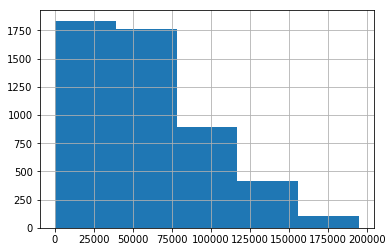

In [16]:
comparison['Salary'].hist(bins=5); # create the histogram

print("Mean of salary: ", comparison['Salary'].mean())
print("Maximum of salary: ", comparison['Salary'].max())

#### Insights:
We can see that the histogram is right skewed.

This suggests that the majority of the sample earns less than the average 58 k per annum

In [17]:
comparison['Salary'].describe() #getting an idea of the main descriptive stats

count    5009.000000  
mean     58341.398571 
std      40753.384986 
min      0.000000     
25%      27956.989247 
50%      51612.903226 
75%      83333.333333 
max      195000.000000
Name: Salary, dtype: float64

## Data Preparation:
Lets group the respondents by salary and see how their answers differ.

In [18]:
# Creating different salary groups with eight categories in 25k steps

bins = [0,1,25000,50000,75000,100000,125000,150000,175000,200000]
labels = ['Category_0','Category_1','Category_2','Category_3','Category_4','Category_5','Category_6','Category_7','Category_8']

comparison['Salary_Category'] = pd.cut(comparison['Salary'],bins, labels = labels)

comparison.head()

,Salary,ImportantBenefits,Salary_Category
0,NaN,Stock options; Vacation/days off; Remote options,NaN
1,NaN,NaN,NaN
2,113750.0,NaN,Category_5
3,NaN,Stock options; Annual bonus; Health benefits; Equipment; Private office,NaN
4,NaN,NaN,NaN


Since these groups have different sizes, we do not need them really, it would be better to use quantiles here

In [19]:
comparison.drop(['Salary_Category'], axis=1)

comparison.head()

,Salary,ImportantBenefits,Salary_Category
0,NaN,Stock options; Vacation/days off; Remote options,NaN
1,NaN,NaN,NaN
2,113750.0,NaN,Category_5
3,NaN,Stock options; Annual bonus; Health benefits; Equipment; Private office,NaN
4,NaN,NaN,NaN


Let's take a look at the quantile thresholds:

In [20]:
print(set(pd.qcut(comparison['Salary'], q=4)))

{nan, Interval(51612.902999999998, 83333.332999999999, closed='right'), Interval(27956.989000000001, 51612.902999999998, closed='right'), Interval(83333.332999999999, 195000.0, closed='right'), Interval(-0.001, 27956.989000000001, closed='right')}


In [21]:
labels_quantiles = ['Q1','Q2','Q3','Q4']

comparison['Salary_quantile'] = pd.qcut(comparison['Salary'], q=4, labels = labels_quantiles)

comparison.head(10)

,Salary,ImportantBenefits,Salary_Category,Salary_quantile
0,NaN,Stock options; Vacation/days off; Remote options,NaN,NaN
1,NaN,NaN,NaN,NaN
2,113750.0,NaN,Category_5,Q4
3,NaN,Stock options; Annual bonus; Health benefits; Equipment; Private office,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,Vacation/days off; Expected work hours,NaN,NaN
6,NaN,Health benefits; Equipment; Professional development sponsorship; Education sponsorship; Remote options,NaN,NaN
7,NaN,Equipment; Professional development sponsorship; Expected work hours; Remote options,NaN,NaN
8,NaN,Stock options; Annual bonus; Health benefits; Equipment; Remote options,NaN,NaN
9,NaN,Vacation/days off; Long-term leave; Expected work hours; Remote options; Child/elder care,NaN,NaN


Grouping by the quantiles does not help much, as the benefits are concatinated again, as can be seen below

In [22]:
comparison_q1 = comparison.groupby("Salary_quantile")["ImportantBenefits"].value_counts().to_frame()

comparison_q1.head()

ImportantBenefits
Salary_quantile ImportantBenefits                                                                                                          
Q1              Vacation/days off; Equipment; Professional development sponsorship; Expected work hours; Remote options   12               
                Vacation/days off; Health benefits; Equipment; Professional development sponsorship; Expected work hours  10               
                Annual bonus; Health benefits; Equipment; Professional development sponsorship; Remote options            9                
                None of these                                                                                             9                
                Vacation/days off; Health benefits; Equipment; Professional development sponsorship; Remote options       9

In [23]:
# In order to take a look at the first quantile only, the data is filtered first

comparison_q1 = comparison.loc[comparison.Salary_quantile == "Q1"].copy()

comparison_q1.loc[:,'ImportantBenefits'] = comparison_q1['ImportantBenefits'].fillna("Not answered")

comparison_q1.head()


,Salary,ImportantBenefits,Salary_Category,Salary_quantile
34,14838.709677,Stock options; Annual bonus; Equipment; Professional development sponsorship; Child/elder care,Category_1,Q1
52,15674.203822,Health benefits; Professional development sponsorship; Long-term leave; Remote options,Category_1,Q1
61,6636.323594,Not answered,Category_1,Q1
65,17777.777778,Not answered,Category_1,Q1
97,27548.209366,Vacation/days off; Health benefits; Remote options; Meals,Category_2,Q1


In [24]:
# Then the results are counted

comparison_q1_count = comparison_q1['ImportantBenefits'].value_counts().reset_index()

comparison_q1_count.head()

,index,ImportantBenefits
0,Not answered,372
1,Vacation/days off; Equipment; Professional development sponsorship; Expected work hours; Remote options,12
2,Vacation/days off; Health benefits; Equipment; Professional development sponsorship; Expected work hours,10
3,Annual bonus; Health benefits; Equipment; Professional development sponsorship; Remote options,9
4,None of these,9


In [25]:
# Before continuing, let's change this index column to a more appropriate name

comparison_q1_count.rename(columns={'index': 'Benefits', 'ImportantBenefits': 'count'}, inplace=True)
comparison_q1_count.head()

,Benefits,count
0,Not answered,372
1,Vacation/days off; Equipment; Professional development sponsorship; Expected work hours; Remote options,12
2,Vacation/days off; Health benefits; Equipment; Professional development sponsorship; Expected work hours,10
3,Annual bonus; Health benefits; Equipment; Professional development sponsorship; Remote options,9
4,None of these,9


In [26]:
# Finally the individual values are separated, just like we did before
# These are the results for Q1

q1_count = total_count(comparison_q1_count, 'Benefits', 'count', uniquebenefits)
q1_count

,Benefits,count
7,Vacation/days off,478
2,Remote options,472
10,Health benefits,444
1,Professional development sponsorship,405
14,Equipment,393
9,Not answered,372
13,Expected work hours,366
16,Annual bonus,357
12,Meals,184
5,Education sponsorship,173


Now that we have a repeatable scheme, we can run the code for Q2, Q3 and Q4.

(This could have been done in a more compact way, but for the scope of the project this solution oriented method should be fine)

In [27]:
# Filter for Q2
comparison_q2 = comparison.loc[comparison.Salary_quantile == "Q2"].copy()

# Fill NaN values for ImportantBenefits with "Not answered" 
comparison_q2.loc[:,'ImportantBenefits'] = comparison_q2['ImportantBenefits'].fillna("Not answered")

# Count results by ImportantBenefits
comparison_q2_count = comparison_q2['ImportantBenefits'].value_counts().reset_index()

# Change labels
comparison_q2_count.rename(columns={'index': 'Benefits', 'ImportantBenefits': 'count'}, inplace=True)

# Split results to individual ImportantBenefits
q2_count = total_count(comparison_q2_count, 'Benefits', 'count', uniquebenefits)
q2_count

,Benefits,count
7,Vacation/days off,596
2,Remote options,500
14,Equipment,472
13,Expected work hours,463
1,Professional development sponsorship,426
10,Health benefits,396
9,Not answered,323
16,Annual bonus,279
17,Retirement,225
5,Education sponsorship,136


In [28]:
# Filter for Q3
comparison_q3 = comparison.loc[comparison.Salary_quantile == "Q3"].copy()

# Fill NaN values for ImportantBenefits with "Not answered" 
comparison_q3.loc[:,'ImportantBenefits'] = comparison_q3['ImportantBenefits'].fillna("Not answered")

# Count results by ImportantBenefits
comparison_q3_count = comparison_q3['ImportantBenefits'].value_counts().reset_index()

# Change labels
comparison_q3_count.rename(columns={'index': 'Benefits', 'ImportantBenefits': 'count'}, inplace=True)

# Split results to individual ImportantBenefits
q3_count = total_count(comparison_q3_count, 'Benefits', 'count', uniquebenefits)
q3_count

,Benefits,count
7,Vacation/days off,618
2,Remote options,516
13,Expected work hours,477
14,Equipment,433
10,Health benefits,407
1,Professional development sponsorship,366
9,Not answered,331
17,Retirement,329
16,Annual bonus,262
3,Long-term leave,138


In [29]:
# Filter for Q4
comparison_q4 = comparison.loc[comparison.Salary_quantile == "Q4"].copy()

# Fill NaN values for ImportantBenefits with "Not answered" 
comparison_q4.loc[:,'ImportantBenefits'] = comparison_q4['ImportantBenefits'].fillna("Not answered")

# Count results by ImportantBenefits
comparison_q4_count = comparison_q4['ImportantBenefits'].value_counts().reset_index()

# Change labels
comparison_q4_count.rename(columns={'index': 'Benefits', 'ImportantBenefits': 'count'}, inplace=True)

# Split results to individual ImportantBenefits
q4_count = total_count(comparison_q4_count, 'Benefits', 'count', uniquebenefits)
q4_count

,Benefits,count
7,Vacation/days off,647
10,Health benefits,613
2,Remote options,592
13,Expected work hours,486
17,Retirement,395
14,Equipment,378
1,Professional development sponsorship,308
9,Not answered,294
16,Annual bonus,286
6,Stock options,204


We can now merge all of the table together to have a better overview of the results.

In [30]:
Merge_1 = q1_count.merge(q2_count,on='Benefits', suffixes=("_Q1", "_Q2"))
Merge_2 = Merge_1.merge(q3_count,on='Benefits', suffixes=("_Q2", "_Q3"))
Merge_3 = Merge_2.merge(q4_count,on='Benefits', suffixes=("_Q3", "_Q4"))

Merge_3

,Benefits,count_Q1,count_Q2,count_Q3,count_Q4
0,Vacation/days off,478,596,618,647
1,Remote options,472,500,516,592
2,Health benefits,444,396,407,613
3,Professional development sponsorship,405,426,366,308
4,Equipment,393,472,433,378
5,Not answered,372,323,331,294
6,Expected work hours,366,463,477,486
7,Annual bonus,357,279,262,286
8,Meals,184,126,95,75
9,Education sponsorship,173,136,123,66


Now it would be interesting to see the percent values for each column to see what percentage of Qn has selected Benefit x.

For easier and quicker visualizations, MS Excel is used for the final visualizations in the article.

In [31]:
# Computing Cumulative Percentage
Merge_3['Q1_percent'] = 100*(Merge_3.count_Q1.cumsum() / Merge_3.count_Q1.sum())
Merge_3['Q2_percent'] = 100*(Merge_3.count_Q2.cumsum() / Merge_3.count_Q2.sum())
Merge_3['Q3_percent'] = 100*(Merge_3.count_Q3.cumsum() / Merge_3.count_Q4.sum())
Merge_3['Q4_percent'] = 100*(Merge_3.count_Q4.cumsum() / Merge_3.count_Q4.sum())

Merge_3

,Benefits,count_Q1,count_Q2,count_Q3,count_Q4,Q1_percent,Q2_percent,Q3_percent,Q4_percent
0,Vacation/days off,478,596,618,647,11.294896,13.530079,13.199487,13.818881
1,Remote options,472,500,516,592,22.448015,24.880817,24.220419,26.463050
2,Health benefits,444,396,407,613,32.939509,33.870602,32.913285,39.555745
3,Professional development sponsorship,405,426,366,308,42.509452,43.541430,40.730457,46.134131
4,Equipment,393,472,433,378,51.795841,54.256527,49.978642,54.207604
5,Not answered,372,323,331,294,60.586011,61.589103,57.048270,60.486971
6,Expected work hours,366,463,477,486,69.234405,72.099886,67.236224,70.867151
7,Annual bonus,357,279,262,286,77.670132,78.433598,72.832123,76.975651
8,Meals,184,126,95,75,82.017958,81.293984,74.861170,78.577531
9,Education sponsorship,173,136,123,66,86.105860,84.381385,77.488253,79.987185


## Insights / Evaluation:
- Only < 0.3% of the answers indicated indifference towards benefits.
- Throughout all salary groups, vacation/ days off were the most mentioned.
- For Q1, however, it was less important than for the other groups. Same is true for the remote options.
- Expected work hours were less important to lower salary respondents compared to higher income respondents.
- Professional development sponsorship, educational sponsorship and equipment were clearly more important to lower salary groups.
- Annual bonus, meals, child / elder care were more important to the lower income group.

In summary, it can be said that companies with a lower budget trying to hire devs should focus on annual bonus, meals, educational sponsorship, child / elder care. While vacation / days off and remote options are less important for lower income candidates compared to their higher income peers, these are still the top priorities. Also, equipment tends to be more important to this group.

# Question 3

**3.** How many years of work experience can a company expect for which salary budget?

We will be using the YearsCodedJob information as a measure for experience.

- For how many years have you coded as part of your job? - 'YearsCodedJob'

## Data Understanding:
Let's have a look at what the participants say

In [32]:
YearsCodedJob_Count = df['YearsCodedJob'].value_counts().reset_index()
YearsCodedJob_Count

,index,YearsCodedJob
0,1 to 2 years,1867
1,2 to 3 years,1755
2,3 to 4 years,1458
3,4 to 5 years,1318
4,20 or more years,1188
5,5 to 6 years,1123
6,Less than a year,1050
7,9 to 10 years,777
8,6 to 7 years,713
9,10 to 11 years,656


## Data Preparation:

In [33]:
# Calculate correlation between years of coding experience and salary

YearsCodedJob_Count['YearsCodedJob'].corr(df['Salary'], method='pearson')

0.23615793515908712

As expected there is a correlation between years of experience and salary.

However, the correlation is lower than expected.

This means that there might be some developers with a lot of experience with a comparably low salary.

In [34]:
# Let's see which answering options there were for this question

YearsCodedJob_selection = YearsCodedJob_Count['index'].tolist()
print(YearsCodedJob_selection)

['1 to 2 years', '2 to 3 years', '3 to 4 years', '4 to 5 years', '20 or more years', '5 to 6 years', 'Less than a year', '9 to 10 years', '6 to 7 years', '10 to 11 years', '7 to 8 years', '8 to 9 years', '11 to 12 years', '15 to 16 years', '14 to 15 years', '12 to 13 years', '16 to 17 years', '13 to 14 years', '17 to 18 years', '19 to 20 years', '18 to 19 years']


A quick check of the YearsCodedJob column to see if values are properly replaced with the following code.

In [35]:
df['YearsCodedJob'].head()

0    NaN             
1    NaN             
2    20 or more years
3    9 to 10 years   
4    10 to 11 years  
Name: YearsCodedJob, dtype: object

The NaN values are replaced by 0, as these respondents do not seem to have work experience in coding yet.

In [36]:
df['YearsCodedJob'] = df['YearsCodedJob'].fillna(0)
df['YearsCodedJob'].head()

0    0               
1    0               
2    20 or more years
3    9 to 10 years   
4    10 to 11 years  
Name: YearsCodedJob, dtype: object

Let's change the naming scheme here.

The number 1 for instance now indicates that the respondent has more than one year of experience, but less than two.


In [37]:
df['YearsCodedJob'] = df['YearsCodedJob'].replace({'Less than a year':0,
                                                    '1 to 2 years':1,
                                                    '2 to 3 years':2,
                                                    '3 to 4 years':3,
                                                    '4 to 5 years':4,
                                                    '5 to 6 years':5,
                                                    '6 to 7 years':6,
                                                    '7 to 8 years':7,
                                                    '8 to 9 years':8,
                                                    '9 to 10 years':9,
                                                    '10 to 11 years':10,
                                                    '11 to 12 years':11,
                                                    '12 to 13 years':12,
                                                    '13 to 14 years':13,
                                                    '14 to 15 years':14,    
                                                    '15 to 16 years':15,
                                                    '16 to 17 years':16,
                                                    '17 to 18 years':17,
                                                    '18 to 19 years':18,
                                                    '19 to 20 years':19,
                                                    '20 or more years':20})
df['YearsCodedJob'].head(17)

0     0 
1     0 
2     20
3     9 
4     10
5     0 
6     8 
7     7 
8     7 
9     8 
10    11
11    8 
12    0 
13    15
14    20
15    1 
16    8 
Name: YearsCodedJob, dtype: int64

Dropping the NaN values here makes sense, because we want to find out how experience influences salary

In [38]:
# Taking a look at the first to entries in the "Salary" column to check to following code for dropping NaN values
df['Salary'].head(10)

0   NaN      
1   NaN      
2    113750.0
3   NaN      
4   NaN      
5   NaN      
6   NaN      
7   NaN      
8   NaN      
9   NaN      
Name: Salary, dtype: float64

In [39]:
comparison_exp_salary = df.dropna(subset=['Salary'])
comparison_exp_salary['Salary'].head(10)

2     113750.000000
14    100000.000000
17    130000.000000
18    82500.000000 
22    100764.000000
25    175000.000000
34    14838.709677 
36    28200.000000 
37    118279.569892
52    15674.203822 
Name: Salary, dtype: float64

Let's draw a scatter plot with the "YearsCodedJob" and "Salary"

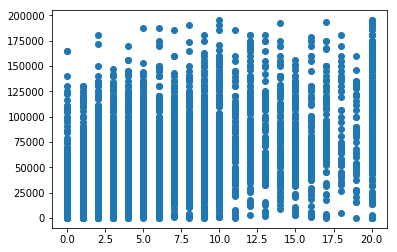

In [40]:
x = comparison_exp_salary['YearsCodedJob']
y = comparison_exp_salary['Salary']

plt.scatter(x, y)

This is not exactly what we were looking for here.

We should be looking at the average salary per "experience group" here, to get a better idea.

In [41]:
# Grouping by "YearsCodedJob" and calculating the mean salary by group

comparison_exp_salary = comparison_exp_salary.groupby(['YearsCodedJob']).mean()
comparison_exp_salary.head(21)

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
YearsCodedJob,,,,,,,
0,9286.536765,7.409594,7.267658,2.798246,8.518519,35338.445227,NaN
1,9815.854617,7.360947,6.811881,2.792969,8.437500,35278.699878,NaN
2,9684.195423,7.408451,6.980634,2.981061,8.525714,39809.037710,NaN
3,9343.080082,7.543210,6.865979,2.845188,8.443182,47783.630853,NaN
4,9405.589569,7.502283,7.024943,2.500000,8.587224,50411.908425,NaN
5,9210.303483,7.523691,6.887781,2.313514,8.471053,52545.598442,NaN
6,9771.946360,7.643678,7.091954,2.608696,8.412245,56798.069017,NaN
7,8875.382609,7.681223,7.406114,2.412371,8.403587,63627.249853,NaN
8,8817.147959,7.448980,6.943878,2.135802,8.377049,65269.768559,NaN


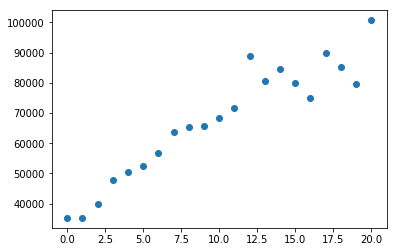

In [42]:
# Let's take a first look at the data in a scatter plot

x = list(range(0, 21))
y = comparison_exp_salary['Salary']

plt.scatter(x, y)

The scatter plot gives us an idea and easy to read guide of how much a developer with years of experience (x) is expected to earn (y).

To see which groups are above or below the expected salary, we may add a reference line and improve the visualization a bit for easier reading.

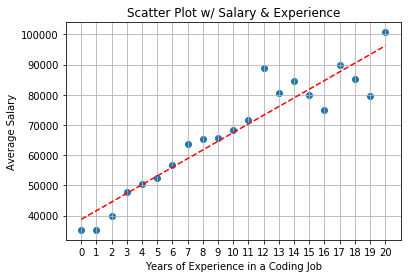

In [43]:
# Adding a reference line and a couple of details makes it easier to illustrate the relationship 

x = list(range(0, 21))
y = comparison_exp_salary['Salary']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.xticks(np.arange(min(x), max(x)+1, 1.0))

plt.xlabel('Years of Experience in a Coding Job')
plt.ylabel('Average Salary')
plt.title('Scatter Plot w/ Salary & Experience')
plt.grid(which='major', axis='both') 

plt.show()

## Insights / Evaluation:
Any group below the line will offer an above average value for money
he dots that are positioned below the reference line indicate a favourable relation between salary and experience from the perspective of the company. 
Developers with less experience will likely ask for a lower salary. Interestingly, with increasing experience the salary fluctuates more.